_________________

# Imports

Import all relevant dependencies
_________________

In [1]:
import torch
from utils import plot_digits, plot_original_vs_encoded

from models.autoencoder.autoencoder import  Autoencoder
from models.ebm.energy_net import EnergyNet

import matplotlib.pyplot as plt


_________________

# Load Autoencoder and EBM
The best parameters are saved with the prefix 'best' in the checkpoints folder
_________________

In [2]:
# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Load Autoencoder
autoencoder = Autoencoder(input_dim=28*28, hidden_dim=1024, encoded_dim=4)
autoencoder.to(device)

# Load pretrained best checkpoint
best_autoencoder_ckpt_path = './saved_ckpts/autoencoder/autoencoder_best.pth'
autoencoder.load_pretrained_model(model_ckpt_path=best_autoencoder_ckpt_path)

Model Loaded Sucessully


In [4]:
# Load EBM
energy_model = EnergyNet(in_dim=autoencoder.encoded_dim, autoencoder_ckpt_path=autoencoder.ckpt_path ,hid_dim=8)
energy_model.to(device)

# Load pretrained best checkpoint
best_ebm_ckpt_path = './saved_ckpts/ebm/ebm_best.pth'
energy_model.load_pretrained_model(model_ckpt_path=best_ebm_ckpt_path)

Model Loaded Sucessully


_________________________
# Autoencoder : Inference
Lets first see how the autoencoder performs
_________________________


In [5]:
# Run this after running the Dataset section of train.ipynb
X_test   = torch.load('./data/MNIST_binary/X_test.pt').to(torch.float32)

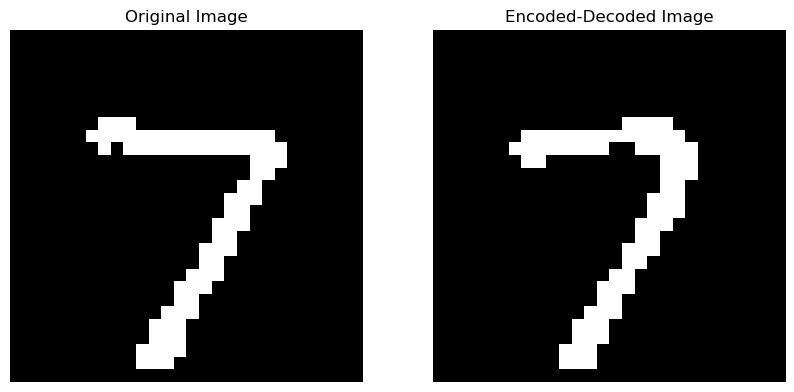

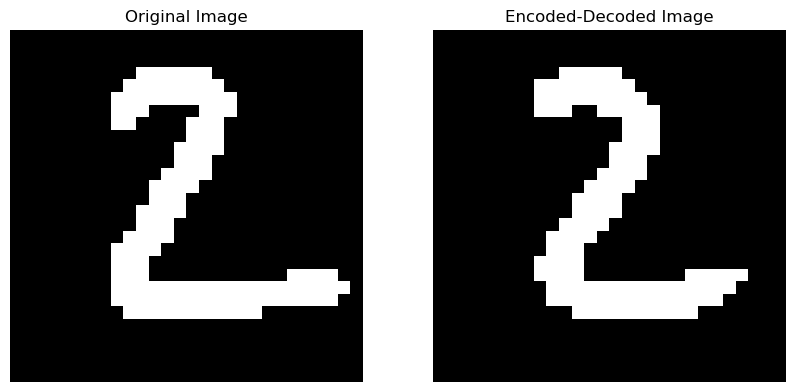

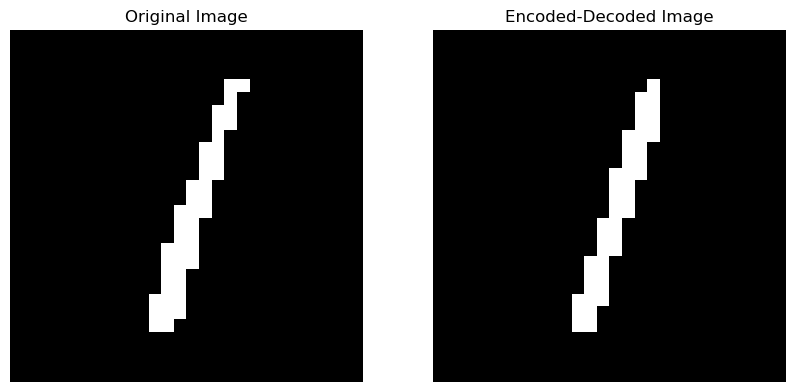

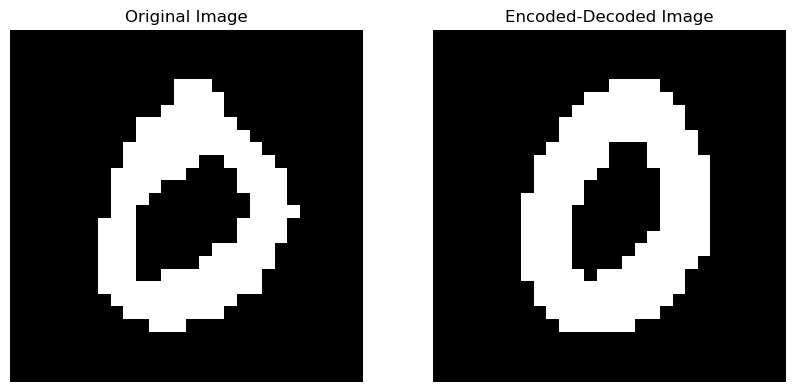

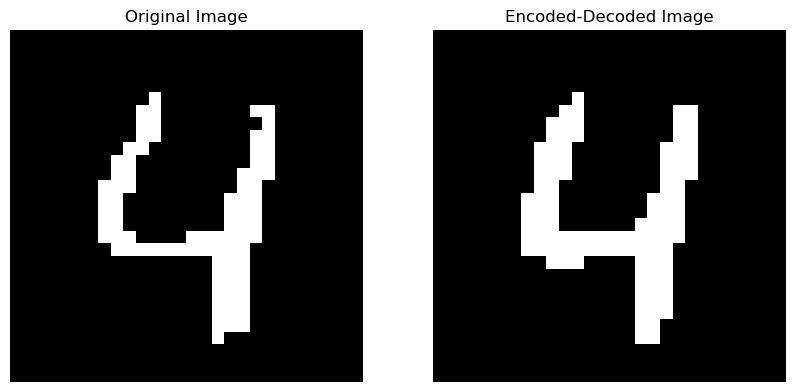

In [6]:
# Pass images through autoencoder
for idx in range(5):
    plot_original_vs_encoded(x=X_test[idx], model=autoencoder)

______________________________

# EBM : Inference
Once the autoencoder is ready, we move onto see the results of trained EBM
______________________________



In [7]:
# Generate images from energy model
generated_images  = energy_model.generate_images(autoencoder=autoencoder, num_images=25, device=device)

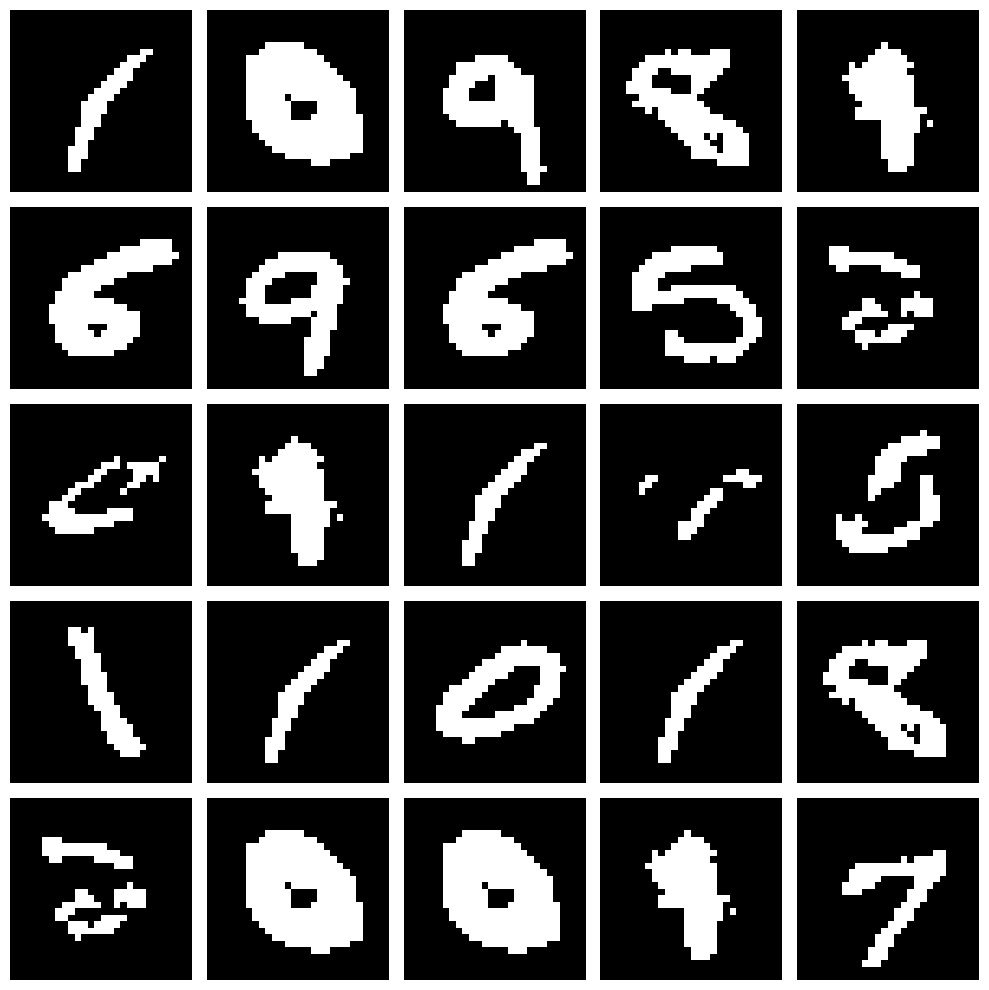

In [8]:
# Visualise the generated images
plot_digits(X=generated_images, Y=None, n=25)

_______________________

# THANK YOU
_______________________
